# Modelo basado en capas convolucionales para clasificación de dígitos

 Modelo preentrenado (formato .h5):

In [30]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


Usar el modelo descargado

In [31]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9926 - loss: 0.0355
Precisión en el conjunto de prueba: 0.9934999942779541


Realizar una predicción

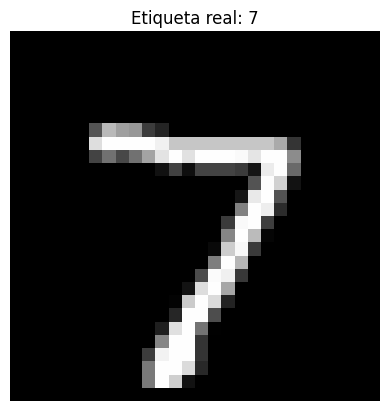

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicción del modelo: 7


In [35]:

idx = 0  # Cambia este índice para probar otras imágenes
img = x_test[idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {y_test[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

# Para hacer

1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado
2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.
3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.
4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3.

Forma de los filtros: (3, 3, 1, 64)


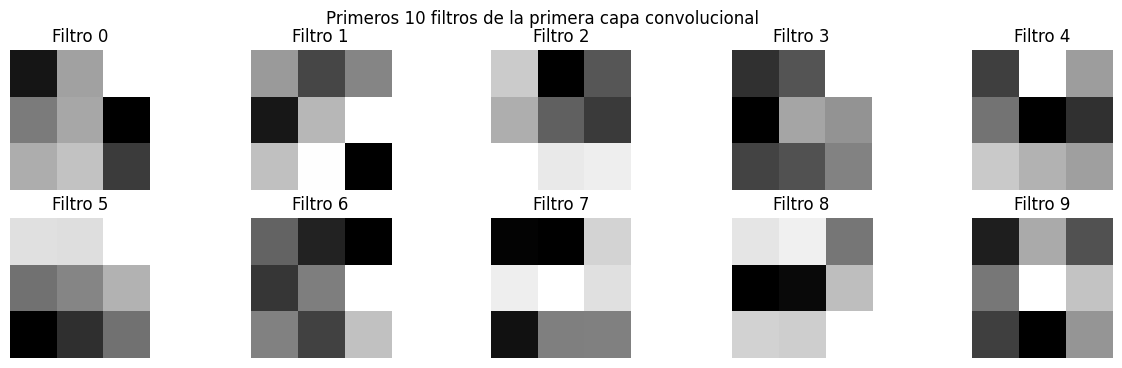

In [36]:
# Extraer la primera capa convolucional
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

# Obtener los pesos del kernel
filters, biases = first_conv_layer.get_weights()

print("Forma de los filtros:", filters.shape)  # (filtros, alto, ancho, canales)
# Reordenar para visualizar (número de filtros, alto, ancho)
filters = filters.transpose(3, 0, 1, 2)

# Mostrar los primeros 10 kernels
plt.figure(figsize=(15, 4))
for i in range(10):
    f = filters[i, :, :, 0]  # filtro i, canal 0
    plt.subplot(2, 5, i+1)
    plt.imshow(f, cmap='gray')
    plt.title(f'Filtro {i}')
    plt.axis('off')
plt.suptitle('Primeros 10 filtros de la primera capa convolucional')
plt.show()
